In [1]:
from sideinfo_MZ import *
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal


In [22]:
def generate_data_MultiDim(job=0, n_samples=10000,data_vis=0,Dim=5):
    if job == 0: # Gaussian mixtures 
        X=np.zeros([n_samples,Dim])
        mu=np.zeros([2,Dim])
        Sigma=np.zeros([2,Dim])
        for i in range(Dim):
            X[:,i]=np.random.uniform(-1,1,size = n_samples)
        ## spicify the centers
        mu[0,:] += 0.5
        mu[1,:] -= 0.5
        Sigma[0,:] += 0.25
        Sigma[1,:] += 0.25
        var1=multivariate_normal(mean=mu[0,:], cov=np.diag(Sigma[0,:]))
        var2=multivariate_normal(mean=mu[1,:], cov=np.diag(Sigma[1,:]))
        
        pi1=((var1.pdf(X)+var2.pdf(X))*4).clip(max=1)
#         print(np.amax(pi1))
                   
        p = np.zeros(n_samples)
        h = np.zeros(n_samples)
               
        for i in range(n_samples):
            rnd = np.random.uniform()
            if rnd > pi1[i]:
                p[i] = np.random.uniform()
                h[i] = 0
            else:
                p[i] = np.random.beta(a = 0.3, b = 4)
                h[i] = 1
        return p, h, X
    if job == 1: # Linear trend
        pass
#         x1 = np.random.uniform(-1,1,size = n_samples)
#         x2 = np.random.uniform(-1,1,size = n_samples)
#         pi1 = 0.1 * (x1 + 1) /2 +  0.3 *(1-x2) / 2
        
#         p = np.zeros(n_samples)
#         h = np.zeros(n_samples)
         
#         for i in range(n_samples):
#             rnd = np.random.uniform()
#             if rnd > pi1[i]:
#                 p[i] = np.random.uniform()
#                 h[i] = 0
#             else:
#                 p[i] = np.random.beta(a = 0.3, b = 4)
#                 h[i] = 1
#         X = np.concatenate([[x1],[x2]]).T
        
#         if data_vis == 1:
#             fig = plt.figure()
#             ax1 = fig.add_subplot(121)
#             x_grid = np.arange(-1, 1, 1/100.0)
#             y_grid = np.arange(-1, 1, 1/100.0)
#             X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
#             pi1_grid =  0.1 * (X_grid + 1) /2 +  0.3 *(1-Y_grid) / 2
            
#             ax1.pcolor(X_grid, Y_grid, pi1_grid)
            
#             ax2 = fig.add_subplot(122)
#             alt=ax2.scatter(x1[h==1][1:50], x2[h==1][1:50],color='r')
#             nul=ax2.scatter(x1[h==0][1:50], x2[h==0][1:50],color='b')
#             ax2.legend((alt,nul),('50 alternatives', '50 nulls'))
            
#         return p, h, X
        
        
        
    if job == 2: # Gaussian mixture + linear trend
        pass
#         x1 = np.random.uniform(-1,1,size = n_samples)
#         x2 = np.random.uniform(-1,1,size = n_samples)
#         pi1 = ((mlab.bivariate_normal(x1, x2, 0.25, 0.25, -0.5, -0.2)+
#                mlab.bivariate_normal(x1, x2, 0.25, 0.25, 0.7, 0.5))/2).clip(max=1)        
#         pi1 = pi1 * 0.5 + 0.5*(0.5 * (x1 + 1) /2 +  0.3 *(1-x2) / 2)
        
#         p = np.zeros(n_samples)
#         h = np.zeros(n_samples)
               
#         for i in range(n_samples):
#             rnd = np.random.uniform()
#             if rnd > pi1[i]:
#                 p[i] = np.random.uniform()
#                 h[i] = 0
#             else:
#                 p[i] = np.random.beta(a = 0.3, b = 4)
#                 h[i] = 1
#         X = np.concatenate([[x1],[x2]]).T
        
#         if data_vis == 1:
#             fig = plt.figure()
#             ax1 = fig.add_subplot(121)
#             x_grid = np.arange(-1, 1, 1/100.0)
#             y_grid = np.arange(-1, 1, 1/100.0)
#             X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
#             pi1_grid = ((mlab.bivariate_normal(X_grid, Y_grid, 0.25, 0.25, -0.5, -0.2)+
#                mlab.bivariate_normal(X_grid, Y_grid, 0.25, 0.25, 0.7, 0.5))/2).clip(max=1)  * 0.5 + (0.5 * (0.5 * (X_grid + 1) /2 +  0.3 *(1-Y_grid) / 2))
#             ax1.pcolor(X_grid, Y_grid, pi1_grid)
            
#             ax2 = fig.add_subplot(122)
#             alt=ax2.scatter(x1[h==1][1:50], x2[h==1][1:50],color='r')
#             nul=ax2.scatter(x1[h==0][1:50], x2[h==0][1:50],color='b')
#             ax2.legend((alt,nul),('50 alternatives', '50 nulls'))
            
#         return p, h, X

In [58]:
x_Dim=5
p, h, x=generate_data_MultiDim(Dim=x_Dim, n_samples=100000)
n_samples=x.shape[0]
print("Num of alt: ", np.sum(h))
print("True null prop: ", 1-np.sum(h)/n_samples)

('Num of alt: ', 10385.0)
('True null prop: ', 0.89615)


In [59]:
dic_BH, t_BH = BH(p)
print("BH: num of dis, threshold:", dic_BH,t_BH)
dic_SBH, t_SBH, pi0_SBH = Storey_BH(p)
print("Storey_BH: num of dis, threshold, null esti", dic_SBH, t_SBH, pi0_SBH)

('BH: num of dis, threshold:', 2400, 0.001199257293509946)
('Storey_BH: num of dis, threshold, null esti', 2542, 0.0014053690792630302, 0.90106666666666668)


In [60]:
p_target=opt_threshold_multi(x, p, k=10, intensity = 1)

In [61]:
pred=(p<p_target)*1
result_summary(h,pred)

('Num of alternatives:', 10385.0)
('Num of discovery:', 3471)
('Num of true discovery:', 3248.0)
('Actual FDR:', 0.064246614808412539)


In [64]:
network = get_network(num_layers = 5, dim = x_Dim).cuda()
optimizer = optim.Adagrad(network.parameters(), lr = 0.01)

In [65]:
print(BH(p))
print(Storey_BH(p))
#p_target = np.ones(x.shape) * Storey_BH(p)[1]
loss_hist = train_network_to_target_p(network, optimizer, x, p_target, num_it = 3000, dim = x_Dim, cuda = True)

(2400, 0.001199257293509946)
(2542, 0.0014053690792630302, 0.90106666666666668)
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


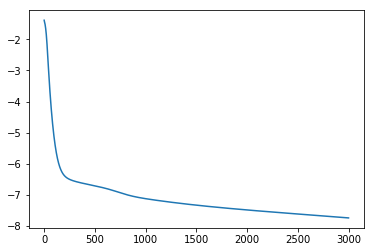

In [66]:
plt.plot(np.log(loss_hist))

In [67]:
#optimizer = optim.Adagrad(network.parameters(), lr = 0.01)
loss_hist, s, s2 = train_network(network, optimizer, x, p, num_it = 3000, dim = x_Dim, lambda2_=1e4, cuda = True)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


(Variable containing:
1.00000e-02 *
  4.0791
[torch.cuda.FloatTensor of size 1 (GPU 0)]
, Variable containing:
1.00000e-03 *
  2.0378
[torch.cuda.FloatTensor of size 1 (GPU 0)]
, Variable containing:
1.00000e-02 *
  4.9958
[torch.cuda.FloatTensor of size 1 (GPU 0)]
)


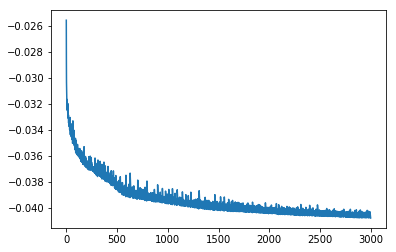

In [68]:
plt.plot(loss_hist)
print(s,s2, s2/s)

In [70]:
network.cpu()
n_samples = len(x)
x_input = Variable(torch.from_numpy(x.astype(np.float32).reshape(n_samples ,x_Dim)))
p_input = Variable(torch.from_numpy(p.astype(np.float32).reshape(n_samples ,1)))
output = network.forward(x_input)
pred = (p_input < output).data.numpy()
pred = pred[:,0].astype(np.float32)

In [71]:
x_input = Variable(torch.from_numpy(x.astype(np.float32).reshape(n_samples ,x_Dim)))
p_input = Variable(torch.from_numpy(p.astype(np.float32).reshape(n_samples ,1)))

output = network.forward(x_input)
pred = (p_input < output).data.numpy()
pred = pred[:,0].astype(np.float32)

print("Num of alternatives:",np.sum(h))
print("Num of discovery:",np.sum(pred))
print("Num of true discovery:",np.sum(pred * h))
print("Actual FDR:", 1-np.sum(pred * h) / np.sum(pred))

('Num of alternatives:', 10385.0)
('Num of discovery:', 4089.0)
('Num of true discovery:', 3837.0)
('Actual FDR:', 0.061628760088041079)


In [72]:
dic_BH, t_BH = BH(p,alpha=0.1)
print("BH: num of dis, threshold:", dic_BH,t_BH)
dic_SBH, t_SBH, pi0_SBH = Storey_BH(p,alpha=0.1)
print("Storey_BH: num of dis, threshold, null esti", dic_SBH, t_SBH, pi0_SBH)

('BH: num of dis, threshold:', 3420, 0.0034178836416361991)
('Storey_BH: num of dis, threshold, null esti', 3611, 0.0040062235731902537, 0.90106666666666668)
